<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[17차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 딥러닝 기반 얼굴 추출 알고리즘에 대해 이해하고 사용할 수 있다.<br><br>
○ 딥러닝 기반 얼굴 인식 알고리즘에 대해 이해하고 사용할 수 있다.        
        </font></td></tr>   
</table>

## 딥러닝 기반 얼굴 추출

### SSD (Single Shot Dectector)

- 2015년 발표
- 다른 모델은 객체 감지를 위해 이미지를 2번 이상 반복하는 것에 반해 1번만으로 객체 감지
- 백본 모델(피쳐 맵 추출기로 작동하는 일반적인 사전 학습된 이미지 분류 네트워크)과   
SSD 헤드(두 개의 컨볼루션 레이어로 구성, 바운딩박스 출력)로 구성

- 참고 : https://github.com/amdegroot/ssd.pytorch

### MTCNN (Multi-Task Cascaded Convolutional Neural Network)

- 2016년 4월 발표
- 3단계의 CNN으로 구성
  - P-Net (Proposed Net) : 얕은 CNN을 통해 후보 창을 신속하게 생성
  - R-Net (Refine Net) : 더 복잡한 CNN을 통해 많은 수의 얼굴이 아닌 바운딩 박스를 제외하여 구체화
  - O-Net (Output Net) : 강력한 CNN을 사용하여 결과를 구체화하고 다섯 개의 얼굴 랜드 마크 위치를 출력

- 논문 : https://kpzhang93.github.io/MTCNN_face_detection_alignment/paper/spl.pdf
- 참고 : https://github.com/ipazc/mtcnn   
<img src="./data/lecture_image/22_mtcnn.jpg" width="30%">    

In [1]:
!pip install mtcnn

[{'box': [257, 314, 103, 141], 'confidence': 0.9999537467956543, 'keypoints': {'left_eye': (285, 371), 'right_eye': (332, 367), 'nose': (311, 402), 'mouth_left': (287, 417), 'mouth_right': (336, 413)}}, {'box': [136, 273, 119, 139], 'confidence': 0.9892704486846924, 'keypoints': {'left_eye': (182, 319), 'right_eye': (225, 342), 'nose': (194, 347), 'mouth_left': (159, 364), 'mouth_right': (200, 384)}}, {'box': [376, 307, 136, 135], 'confidence': 0.9875812530517578, 'keypoints': {'left_eye': (420, 384), 'right_eye': (460, 349), 'nose': (458, 386), 'mouth_left': (456, 421), 'mouth_right': (490, 393)}}, {'box': [205, 193, 124, 126], 'confidence': 0.9415769577026367, 'keypoints': {'left_eye': (247, 241), 'right_eye': (274, 250), 'nose': (252, 273), 'mouth_left': (242, 277), 'mouth_right': (263, 286)}}, {'box': [418, 8, 141, 160], 'confidence': 0.8085078597068787, 'keypoints': {'left_eye': (494, 76), 'right_eye': (515, 95), 'nose': (493, 104), 'mouth_left': (469, 116), 'mouth_right': (484, 1

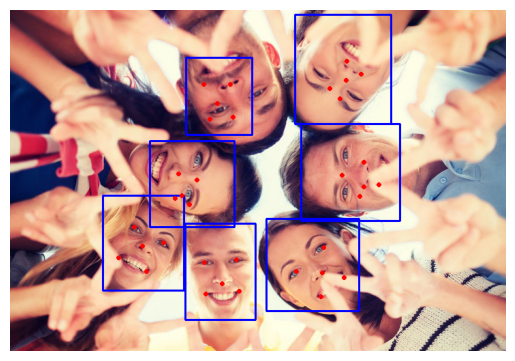

In [2]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

detector = MTCNN()

img = cv2.imread("../OpenCV_data/image/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 영역 검출 (x, y, w, h)
faces = detector.detect_faces(img)

print(faces)

for face in faces:
    if face["confidence"] > 0.7:
        x, y, w, h = face["box"]
        
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 255), 2)
        
        keypoints = face["keypoints"]
        cv2.circle(img, keypoints["left_eye"], 2, (255, 0, 0), 2)
        cv2.circle(img, keypoints["right_eye"], 2, (255, 0, 0), 2)
        cv2.circle(img, keypoints["nose"], 2, (255, 0, 0), 2)
        cv2.circle(img, keypoints["mouth_left"], 2, (255, 0, 0), 2)
        cv2.circle(img, keypoints["mouth_right"], 2, (255, 0, 0), 2)
        
        
plt.imshow(img)
plt.axis("off")
plt.show()


### DSFD (Dual Shot Face Dectector)

- 2019년 4월 발표
- 2개의 스트림 형태로 구성
- 논문 : https://arxiv.org/abs/1810.10220
- 참고 : https://github.com/yxlijun/DSFD.pytorch
- face_detection 참고 : https://pypi.org/project/face-detection/  
<img src="./data/lecture_image/22_dsfd.png" width="50%">    


In [1]:
!pip install face_detection

<img src='./data/lecture_image/22_iou.png' width=50%>

- 선능 분석 도구
    - 이미지 비교를 하는데 하나는 원본 이미지, 하나는 추출된 이미지
    - 분모에는 합집합 분자에는 교집합
    - 교집합을 합집합으로 나누었을 때 iou는 1일 때 가장 크다

/Users/choiyungyu/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/Users/choiyungyu/opt/anaconda3/envs/opencv/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


[[261.18024    313.50018    359.94156    459.69687      0.9999831 ]
 [147.36313    278.79       249.07481    404.43637      0.99986625]
 [419.23477      4.4939065  548.57184    177.78537      0.9998646 ]
 [264.03622     38.82866    398.19836    196.08125      0.9998636 ]
 [378.72552    315.16043    503.47626    438.31943      0.99981636]
 [421.2494     184.62943    575.1961     299.27         0.99649423]
 [187.3292     192.98297    333.932      303.36743      0.994327  ]]


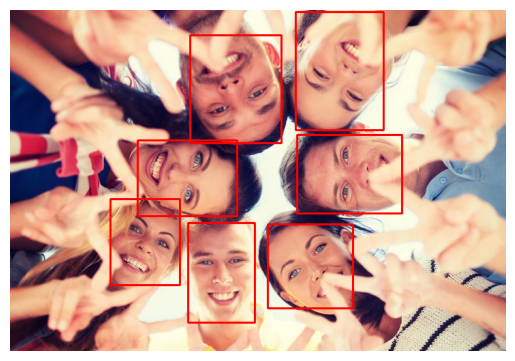

In [2]:
import face_detection
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../OpenCV_data/image/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 정확도는 50%이상, IoU는 30% 이상인 경우에만 검출
detector = face_detection.build_detector("DSFDDetector",
                                          confidence_threshold=0.5,
                                          nms_iou_threshold=0.3)

# 얼굴 영역 반환 (x1, y1, x2, y2, 정확도)
faces = detector.detect(img)

print(faces)

for (x1, y1, x2, y2, conf) in faces:
    if conf >= 0.9 :
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        
plt.imshow(img)
plt.axis("off")
plt.show()

### RetinaFace

- 2019년 5월 발표
- 성능이 매우 우수한 얼굴인식기 (mxnet 기반)
- 참고 : https://github.com/serengil/retinaface

In [5]:
!pip install retina-face

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 32.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.9/449.9 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=6fc913f1e933648987f13990e8001e8a69f0e38bc5bf79d24bbc79cc4da5b943
  Stored in directory: /Users/choiyungyu/Library/Caches/pip/wheels/cf/87/6f/3f34218ef184368cec9ee65bdfd65baf117811f0a0ce1263ff
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: cachetools
    Found exi

In [6]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../OpenCV_data/image/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 검출 (정확도, 얼굴영역, 랜드마크점 5개)
faces = RetinaFace.detect_faces(img)

print(faces)

AttributeError: 'str' object has no attribute 'decode'

(-0.5, 727.5, 500.5, -0.5)

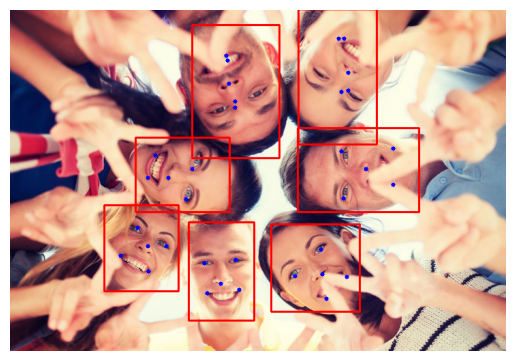

In [10]:
# 위에 값들을 정수형으로 변환해서 tuple로 묶어서 반환
def int_tuple(t) :
    return tuple(int(x) for x in t)

for key in faces:
    indentity = faces[key]
    
    score = indentity["score"]
    face_area = indentity["facial_area"]
    landmarks = indentity["landmarks"]
    
    cv2.circle(img, int_tuple(landmarks["right_eye"]), 3, (0,0,255), -1)
    cv2.circle(img, int_tuple(landmarks["left_eye"]), 3, (0,0,255), -1)
    cv2.circle(img, int_tuple(landmarks["nose"]), 3, (0,0,255), -1)
    cv2.circle(img, int_tuple(landmarks["mouth_right"]), 3, (0,0,255), -1)
    cv2.circle(img, int_tuple(landmarks["mouth_left"]), 3, (0,0,255), -1)
    
    cv2.rectangle(img, (face_area[2], face_area[3]), (face_area[0], face_area[1]), (255, 0, 0), 2)
    
plt.imshow(img)
plt.axis("off")

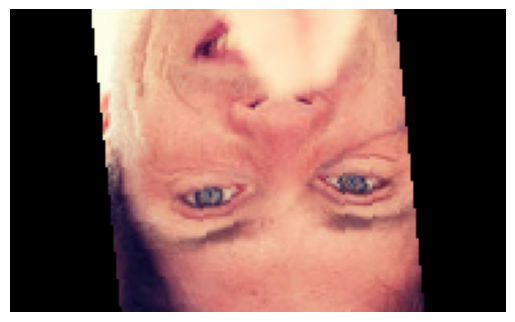

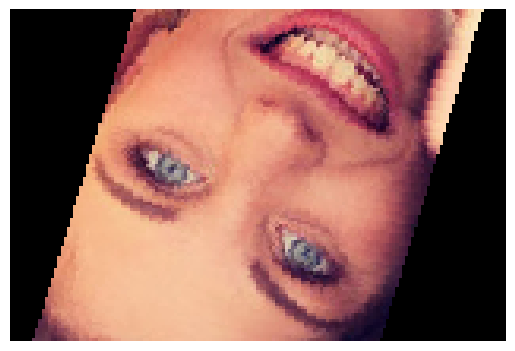

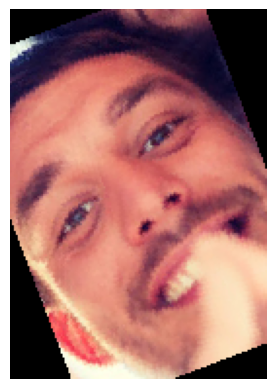

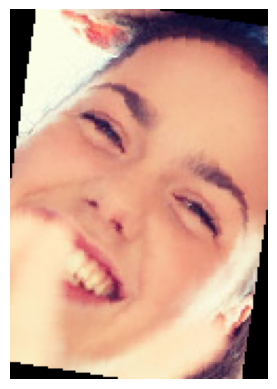

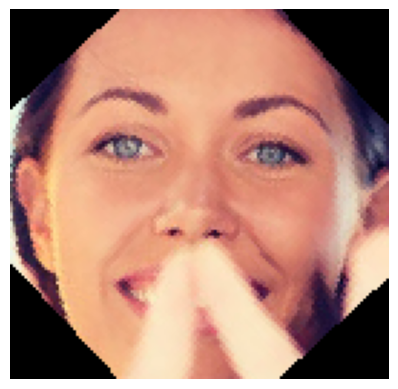

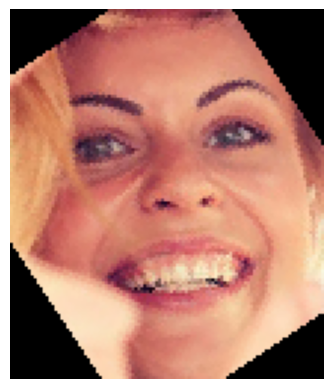

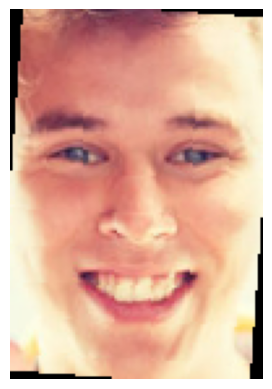

In [16]:
#얼굴 영역만 출력
faces = RetinaFace.extract_faces(img)

img = cv2.imread("../OpenCV_data/image/faces4.jpg")

for img in faces:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### YuNet

- 2021년 10월 발표
- CNN기반 얼굴 탐지기로 가볍고 빠름 (모델이 MB 미만)
- 백본으로 mobilenet을 채택하고 총 85,000 개의 매개 변수를 포함
- 정면얼굴이 아닌 경우에도 잘 동작
- 참고 : https://github.com/opencv/opencv_zoo/tree/master/models/face_detection_yunet
- 모델 훈련 : https://github.com/ShiqiYu/libfacedetection.train

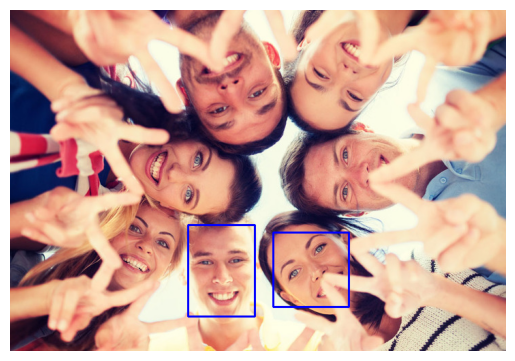

In [10]:
import numpy as np

detector = cv2.FaceDetectorYN.create("../OpenCV_data/model/face_detection_yunet_120x160.onnx",
                                     "",(0,0))

img = cv2.imread("../OpenCV_data/image/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

w, h, _ = img.shape

detector.setInputSize((h,w))

# 얼굴영역 (x, y, w, h) 왼쪽 눈좌표, 오른쪽 눈좌표, 코좌표, 왼쪽 입술좌표, 오른쪽 입술좌표, 정확도  반환
_, faces = detector.detect(img)

# print(faces)

for face in faces:
    # 얼굴 영역좌표만 잘라서 리스트로 저장 (정수형으로 변환)
    box = list(map(int, face[:4]))
    
    cv2.rectangle(img, box, (0, 0, 255), 2)

plt.imshow(img)
plt.axis("off")
plt.show()

[[358.43365     63.035076   389.1919     112.769806     0.999529  ]
 [205.7749      80.15163    249.03871    139.17438      0.99850476]
 [612.2852     106.28925    646.3676     163.40234      0.995336  ]
 [496.98376     79.25402    535.00793    134.48053      0.994276  ]
 [ 45.239853    35.245422    84.79683     86.16613      0.99376374]
 [625.73346     76.39564    655.63       113.837425     0.7604484 ]
 [220.69495     63.66457    258.75916    113.96212      0.6850803 ]]


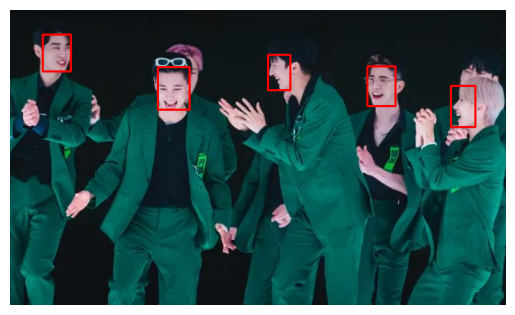

In [11]:
import face_detection
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("../OpenCV_data/image/img11.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 정확도는 50%이상, IoU는 30% 이상인 경우에만 검출
detector = face_detection.build_detector("DSFDDetector",
                                          confidence_threshold=0.5,
                                          nms_iou_threshold=0.3)

# 얼굴 영역 반환 (x1, y1, x2, y2, 정확도)
faces = detector.detect(img)

print(faces)

for (x1, y1, x2, y2, conf) in faces:
    if conf >= 0.9 :
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        
plt.imshow(img)
plt.axis("off")
plt.show()

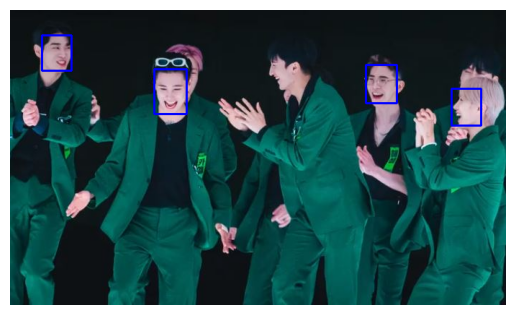

In [9]:
import numpy as np

# face_detection_yunet_120x160 유넷중 이 모델은 별로라서 유넷 다른 모델 찾아볼 필요 있음
detector = cv2.FaceDetectorYN.create("../OpenCV_data/model/face_detection_yunet_120x160.onnx",
                                     "",(0,0))

img = cv2.imread("../OpenCV_data/image/img11.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

w, h, _ = img.shape

detector.setInputSize((h,w))

# 얼굴영역 (x, y, w, h) 왼쪽 눈좌표, 오른쪽 눈좌표, 코좌표, 왼쪽 입술좌표, 오른쪽 입술좌표, 정확도  반환
_, faces = detector.detect(img)

# print(faces)

for face in faces:
    # 얼굴 영역좌표만 잘라서 리스트로 저장 (정수형으로 변환)
    box = list(map(int, face[:4]))
    
    cv2.rectangle(img, box, (0, 0, 255), 2)

plt.imshow(img)
plt.axis("off")
plt.show()

## 얼굴인식

- 실시간 오픈 소스 얼굴인식 소프트웨어
  - 딥 페이스 : https://github.com/serengil/deepface?ref=hackernoon.com
    - FaceNet 및 InsightFace와 같은 다양한 얼굴 인식 방법을 지원
    - Python 개발자라면 시작하기 쉽지만 다른 사람들이 통합하기 어려움 
  - CompareFace : https://github.com/exadel-inc/CompreFace
    - REST API를 사용하면 사전 기계 학습 기술 없이도 시스템에 쉽게 통합 가능
    - 확장 가능하므로 여러 비디오 스트림에서 얼굴을 동시에 인식 가능
    - FaceNet과 InsightFace 선택 가능
    - 현재 개발 중
  - face_recognition : https://github.com/ageitgey/face_recognition?ref=hackernoon.com
    - 인기있는 API이지만 큰 개선 사항이 없고 상당히 오래된 얼굴 인식 모델을 사용
  - FaceNet : https://github.com/davidsandberg/facenet?ref=hackernoon.com
    - 정확도가 매우 높은 API지만 개선이 없음
  - InsightFace : https://github.com/deepinsight/insightface?ref=hackernoon.com
    - 얼굴 감지를 위해 가장 최근의 정확한 얼굴 인식 방법 중 하나
    - LetinaFace 및 SubCenter-ArcFace를 지원
    - 사용하기 쉽지 않다는 단점
  - InsightFace-REST : https://github.com/SthPhoenix/InsightFace-REST?ref=hackernoon.com
    - 2021년부터 생성된 API로 인식속도 향상 버전
    - 얼굴 임베딩만 제공하므로 분류기는 따로 만들어야 함

### face recognition 기반 이미지 내 얼굴 인식

- face_recognition : 업데이터 중지, 오래된 모델
  - https://wiserloner.tistory.com/1123

In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 33.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=b596b30ee6763a0e318d7ac65083de70d5e7d739ee3e16b06c138b9ec3e655de
  Stored in directory: /Users/yun9yuchoi/Library/Caches/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
import face_recognition as fr
import numpy as np
import matplotlib.pyplot as plt
import cv2
imgElon1 = cv2.imread("../OpenCV_data/image/face_info/Elon1.jpg")
imgElon2 = cv2.imread("../OpenCV_data/image/face_info/Elon2.jpg")
imgBill = cv2.imread("../OpenCV_data/image/face_info/Bill.jpg")

imgElon1=cv2.cvtColor(imgElon1, cv2.COLOR_BGR2RGB)
imgElon2=cv2.cvtColor(imgElon2, cv2.COLOR_BGR2RGB)
imgBill=cv2.cvtColor(imgBill, cv2.COLOR_BGR2RGB)

[(142, 340, 365, 117)]


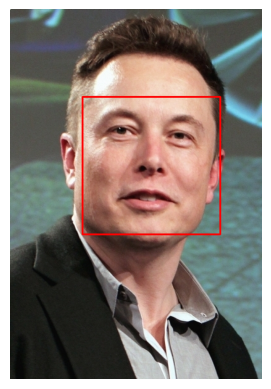

In [25]:
# 얼굴영역 검출
faceElon1 = fr.face_locations(imgElon1)
faceElon2 = fr.face_locations(imgElon2)
faceBill = fr.face_locations(imgBill)

print(faceElon1)

cv2.rectangle(imgElon1, (faceElon1[0][3],faceElon1[0][0]),
                        (faceElon1[0][1], faceElon1[0][2]), (255,0,0), 2)

plt.imshow(imgElon1)
plt.axis("off")
plt.show()

In [29]:
# 얼굴영역들의 특징 분석
encodeElon1 = fr.face_encodings(imgElon1)[0]
encodeElon2 = fr.face_encodings(imgElon2)[0]
encodeBill = fr.face_encodings(imgBill)[0]

print(encodeElon1)

[-0.0357358   0.12669772  0.0974147  -0.068377   -0.16953871  0.04171527
 -0.06375501 -0.11925827  0.11764286 -0.03002571  0.24387527 -0.11042556
 -0.24236582 -0.0187273   0.00842778  0.11831886 -0.16038215 -0.09301673
 -0.02609105 -0.11996762  0.11511198  0.07889849  0.02168837 -0.0273838
 -0.0999766  -0.32544956 -0.1104035  -0.06963699  0.16689153 -0.04767026
  0.01042474  0.01583458 -0.13477601 -0.04238463  0.05281642  0.01509218
 -0.08951138 -0.0987706   0.13563119 -0.02486983 -0.17472652 -0.01585585
  0.01600254  0.21798381  0.15434542  0.07007501  0.0312179  -0.08481079
  0.03344745 -0.24443436  0.08059625  0.19132945  0.04881305  0.00372472
  0.16057363 -0.138715   -0.00537187  0.22318968 -0.1847768   0.10820311
  0.08423571 -0.06825559 -0.00843663 -0.1122361   0.18155763  0.0857439
 -0.07687553 -0.1679626   0.20839347 -0.05256448 -0.12065971  0.11139864
 -0.12872368 -0.16284651 -0.28363454 -0.01703714  0.4695316   0.078463
 -0.20507511  0.01402706 -0.02090216  0.02441754  0.158

In [30]:
# 얼굴 인식 (얼굴 비교)
result1 = fr.compare_faces([encodeElon1],encodeElon2)
print(result1)

[True]


In [31]:
# 정확도(거리) 분석 -> 큰 값일수록 불일치
conf1 = fr.face_distance([encodeElon1],encodeElon2)
print(conf1)

[0.37054816]


### 동영상 내의 얼굴 인식 

- 인코딩된 얼굴 데이터를 읽어와서 누구인지 인식하고 표시

In [13]:
import cv2
import numpy as np
import face_recognition as fr
import os
# 얼굴 특징을 추출하는 함수
def encodeFun(img_paths) :
    encode_list = []
    for img_path in img_paths :
        encode = fr.face_encodings(img_path)[0]
        encode_list.append(encode)
    return encode_list
path = "../OpenCV_data/image/face_info2/"
# 이미지 데이터베이스의 이미지 리스트
images = []
# 이미지 라벨
className = []
# 폴더의 이미지 목록 가져오기
myList = os.listdir(path)
# 이미지 목록을 읽어서 파일명과 클래스 이름을 저장
myList=myList[1:]  # 리스트에 쓸모없는 이름이 들어가 있어서 지움 
for c in myList:
    curImg = cv2.imread(f"{path}{c}")
    curImg = cv2.cvtColor(curImg, cv2.COLOR_BGR2RGB)
    images.append(curImg)
    # 파일명에서 확장자를 제거하고 파일명만 클래스이름으로 저장
    className.append(os.path.splitext(c)[0])
# 폴더에 있는 얼굴이미지 인코딩 (얼굴 DB)
encodeListKnown = encodeFun(images)
print(className)
cap = cv2.VideoCapture("../OpenCV_data/image/ellon.mp4")
while cap.isOpened() :
    ret, frame = cap.read()
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if not ret :
        continue
    # 얼굴 크기를 25% 크기로 변환
    imgS = cv2.resize(frame, (0, 0), None, 0.25, 0.25)
    # 동영상에서 얼굴 위치정보를 추출하고 해당 얼굴을 비교하기 위해 인코딩
    faceCurFrame = fr.face_locations(imgS)
    encodesCurFrame = fr.face_encodings(imgS, faceCurFrame)
    # 동영상의 얼굴과 얼굴 DB의 정보를 비교
    for encodeFace, faceLoc in zip(encodesCurFrame, faceCurFrame) :
        matches = fr.compare_faces(encodeListKnown, encodeFace)
        faceDis = fr.face_distance(encodeListKnown, encodeFace)
        # 거리값이 최소인 값의 인덱스를 반환
        matchindex = np.argmin(faceDis)
        # DB의 얼굴과 동일한 얼굴이 있다면
        if matches[matchindex] :
            y1, x2, y2, x1 = faceLoc
            # 25%로 줄였기 때문에 좌표를 원래대로 복구
            y1, x2, y2, x1 =  y1*4, x2*4, y2*4, x1*4
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, className[matchindex], (x1 + 6, y2 - 6),
                        cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
    cv2.imshow("detect face", frame)
    key = cv2.waitKey(1)
    if key == 49 :
        break
cap.release()
cv2.destroyAllWindows()

['Elon1', 'Elon2', 'Bill']


### 딥페이스 기반 얼굴인식

- 딥페이스 
  - 다양한 얼굴 모델 사용 사용 가능 

In [5]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 48.0 MB/s eta 0:00:0000:0100:01
  Using cached Flask-2.2.2-py3-none-any.whl (101 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 18.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=4b9de8c36ed14da5c317ef4ffe6ba791cd462dd1b04aff67465d2ec17ad24090
  Stored in directory: /Users/choiyungyu/Library/Caches/pip/wheels/20/e8/7b/003fc14f02f262dd4614aec55e41147c8012e3dad98c936b76
Successfully built fire


In [15]:
from deepface import DeepFace
face1 = '../OpenCV_data/image/face_info/Elon2.jpg'
face2 = '../OpenCV_data/image/face_info/Bill.jpg'
# 사용할 모델 종류
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace",
          "DeepFace", "DeepID", "ArcFace", "Dlib"]
# 평가 방법
metrics = ["cosine", "euclidean", "euclidean_l2"]
# 두 얼굴쌍 비교
result = DeepFace.verify(img1_path=face1, img2_path=face2, model_name=models[0],
                         distance_metric=metrics[0])
result

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /Users/choiyungyu/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [02:04<00:00, 4.67MB/s] 


AttributeError: 'str' object has no attribute 'decode'

In [16]:
# 동일한 얼굴을 DB에서 검색
df = DeepFace.find(img_path=face1, db_path="../OpenCV_data/image/face_info2")
df

AttributeError: 'str' object has no attribute 'decode'

In [17]:
#얼굴의 상태 비교 (나이, 성별, 인종, 표정)
#인종 : asian, white, middle eastern, indian, latino, black
#표정 : angry, fear, neutral, sad, disgust, happy, surprise

result = DeepFace.analyze(img_path=face1, actions=['age', 'gender', 'race', 'emotion'])
result

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /Users/choiyungyu/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:01<00:00, 5.67MB/s]


AttributeError: 'str' object has no attribute 'decode'

In [18]:
DeepFace.stream(db_path="../OpenCV_data/image/face_info/")

Detector backend is  opencv


AttributeError: 'str' object has no attribute 'decode'

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


(([], []), ([], []))

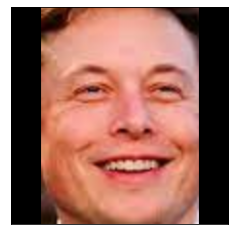

In [20]:
#실습

In [21]:
#실습

[-0.8037726879119873,
 -0.8301395177841187,
 -0.19252946972846985,
 0.0031721368432044983,
 0.5530081987380981,
 -0.39790505170822144,
 -0.11311750113964081,
 0.7511011362075806,
 0.5498688817024231,
 0.14239738881587982,
 0.39171069860458374,
 -0.23487146198749542,
 -0.09491189569234848,
 -0.2383573055267334,
 0.013013623654842377,
 -0.34418928623199463,
 -0.7398867607116699,
 -0.5003213882446289,
 -0.873335599899292,
 -0.19146721065044403,
 -0.21822857856750488,
 -0.07101642340421677,
 0.9409738183021545,
 0.5532684326171875,
 0.5046333074569702,
 -0.1895720362663269,
 0.4241003394126892,
 0.2785875201225281,
 -0.8767327070236206,
 -0.9953244924545288,
 -0.6103775501251221,
 0.024905435740947723,
 -0.4949001669883728,
 0.5554746389389038,
 0.41378992795944214,
 0.6076474189758301,
 0.06129841133952141,
 -0.7089925408363342,
 0.3962189555168152,
 -0.6193293333053589,
 -0.3435373306274414,
 -0.07313559204339981,
 -0.49894681572914124,
 -0.3144562840461731,
 0.06035161763429642,
 -0.438